<a href="https://colab.research.google.com/github/Kirilica98/omut/blob/main/OMUT_HW7_Zamogilnyi_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import LambdaLR

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class ReLUOutputModel(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.W = nn.Linear(input_dim, hidden_dim, bias=False)
        self.b = nn.Parameter(torch.zeros(input_dim))
        nn.init.xavier_normal_(self.W.weight)
        self.to(device)

    def forward(self, x):
        h = self.W(x)
        x_prime = torch.relu(h @ self.W.weight + self.b.unsqueeze(0))
        return x_prime

Using device: cuda


In [ ]:
def generate_data(T, n=10000, sparsity=0.999):
    X = []
    for _ in range(T):
        x = torch.zeros(n, device=device)
        mask = torch.rand(n, device=device) > sparsity
        x[mask] = torch.rand(mask.sum(), device=device)
        x /= torch.norm(x)
        X.append(x)
    return torch.stack(X).to(device)

In [ ]:
def train_model(T, hidden_dim=2, weight_decay=1e-2, num_steps=50000):
    n = 10000
    X = generate_data(T).to(device)
    model = ReLUOutputModel(n, hidden_dim)
    optimizer = optim.AdamW(model.parameters(), lr=0, weight_decay=weight_decay)

    def lr_lambda(step):
        if step < 2500:
            return step / 2500
        else:
            return 0.5 * (1 + np.cos(np.pi * (step - 2500) / (num_steps - 2500)))

    scheduler = LambdaLR(optimizer, lr_lambda)
    losses = []

    for step in range(num_steps):
        optimizer.zero_grad()
        x_prime = model(X)
        loss = torch.mean((X - x_prime) ** 2)
        loss.backward()
        optimizer.step()
        scheduler.step()
        losses.append(loss.item())

    return losses

In [ ]:
hidden_dim = 2
# Ts = [100, 250, 500, 750, 1000, 1250, 1500, 1750, 2000,2500, 3000, 3500, 4000, 4500,  5000]
Ts = [100, 250, 500, 750, 1000, 1500, 2000, 3000, 4000,  5000]
weight_decays = [1e-4]#, 1e-2]

results = {}
for wd in weight_decays:
    results[wd] = {}
    for T in Ts:
        print(f"Training T={T}, wd={wd}...")
        losses = train_model(T=T, hidden_dim=hidden_dim, weight_decay=wd)
        results[wd][T] = losses




Training T=100, wd=0.0001...
Training T=250, wd=0.0001...
Training T=500, wd=0.0001...
Training T=750, wd=0.0001...
Training T=1000, wd=0.0001...
Training T=1500, wd=0.0001...
Training T=2000, wd=0.0001...
Training T=3000, wd=0.0001...
Training T=4000, wd=0.0001...
Training T=5000, wd=0.0001...


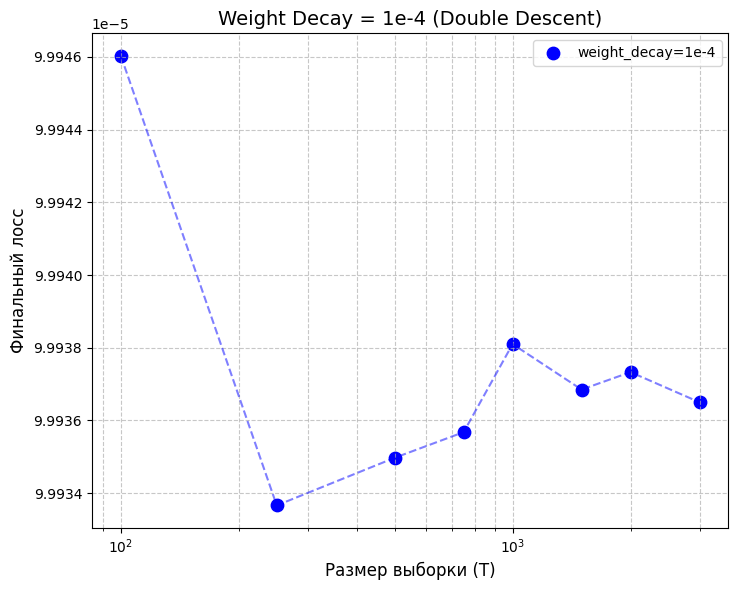

In [ ]:
plt.figure(figsize=(14, 6))

# График для weight_decay=1e-4
plt.subplot(1, 2, 1)
Ts_sorted = sorted(Ts)
final_losses = [results[1e-4][T][-1] for T in Ts_sorted]

plt.scatter(Ts_sorted, final_losses, color='blue', s=80, label='weight_decay=1e-4')
plt.plot(Ts_sorted, final_losses, 'b--', alpha=0.5)
plt.xscale('log')
plt.xlabel('Размер выборки (T)', fontsize=12)
plt.ylabel('Финальный лосс', fontsize=12)
plt.title('Weight Decay = 1e-4 (Double Descent)', fontsize=14)
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.legend()

# График для weight_decay=1e-2
# plt.subplot(1, 2, 2)
# final_losses = [results[1e-2][T][-1] for T in Ts_sorted]

# plt.scatter(Ts_sorted, final_losses, color='red', s=80, label='weight_decay=1e-2')
# plt.plot(Ts_sorted, final_losses, 'r--', alpha=0.5)
# plt.xscale('log')
# plt.xlabel('Размер выборки (T)', fontsize=12)
# plt.ylabel('Финальный лосс', fontsize=12)
# plt.title('Weight Decay = 1e-2', fontsize=14)
# plt.grid(True, which='both', linestyle='--', alpha=0.7)
# plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
hidden_dim = 2
# Ts = [100, 250, 500, 750, 1000, 1250, 1500, 1750, 2000,2500, 3000, 3500, 4000, 4500,  5000]
Ts = [100, 250, 500, 750, 1000, 1500, 2000, 3000, 4000,  5000]
weight_decays = [1e-2]#, 1e-2]

results = {}
for wd in weight_decays:
    results[wd] = {}
    for T in Ts:
        print(f"Training T={T}, wd={wd}...")
        losses = train_model(T=T, hidden_dim=hidden_dim, weight_decay=wd)
        results[wd][T] = losses


Training T=100, wd=0.01...
Training T=250, wd=0.01...
Training T=500, wd=0.01...
Training T=750, wd=0.01...
Training T=1000, wd=0.01...
Training T=1500, wd=0.01...
Training T=2000, wd=0.01...
Training T=3000, wd=0.01...
Training T=4000, wd=0.01...
Training T=5000, wd=0.01...


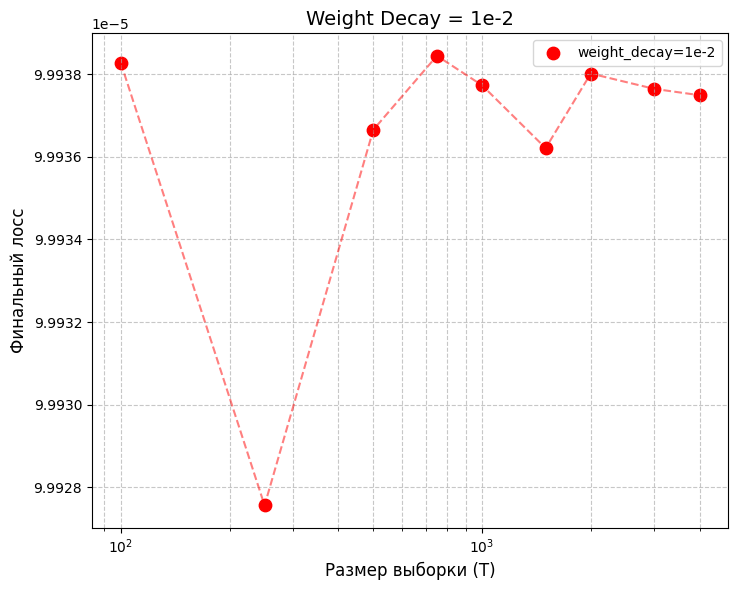

In [ ]:
plt.figure(figsize=(14, 6))

# График для weight_decay=1e-4
# plt.subplot(1, 2, 1)
Ts_sorted = sorted(Ts)
# final_losses = [results[1e-4][T][-1] for T in Ts_sorted]

# plt.scatter(Ts_sorted, final_losses, color='blue', s=80, label='weight_decay=1e-4')
# plt.plot(Ts_sorted, final_losses, 'b--', alpha=0.5)
# plt.xscale('log')
# plt.xlabel('Размер выборки (T)', fontsize=12)
# plt.ylabel('Финальный лосс', fontsize=12)
# plt.title('Weight Decay = 1e-4 (Double Descent)', fontsize=14)
# plt.grid(True, which='both', linestyle='--', alpha=0.7)
# plt.legend()

# График для weight_decay=1e-2
plt.subplot(1, 2, 2)
final_losses = [results[1e-2][T][-1] for T in Ts_sorted]

plt.scatter(Ts_sorted, final_losses, color='red', s=80, label='weight_decay=1e-2')
plt.plot(Ts_sorted, final_losses, 'r--', alpha=0.5)
plt.xscale('log')
plt.xlabel('Размер выборки (T)', fontsize=12)
plt.ylabel('Финальный лосс', fontsize=12)
plt.title('Weight Decay = 1e-2', fontsize=14)
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()